# Week 1

## Overview

As explained in the [*Before week 1* notebook](https://nbviewer.org/github/suneman/socialgraphs2025/blob/main/lectures/How_To_Take_This_Class.ipynb?flush_cache=true), each week of this class is an IPython notebook like this one. **_In order to follow the class, you simply start reading from the top_**, following the instructions.

**Hint**: And you can ask me - or any of the friendly Teaching Assistants - for help at any point if you get stuck!

## Today

This first lecture will go over a few different topics to get you started 

* As the zero'th item. Make sure that you're on top of Python. If you feel you need to refresh. **PLEASE GO TO THE** [Python refresher Notebook](https://nbviewer.org/github/suneman/socialgraphs2025/blob/main/lectures/PythonBootcamp.ipynb?flush_cache=true) and work through it before proceeding.
* And, if you haven't already, also watch the video in the ["How we do things" Notebook](https://nbviewer.org/github/suneman/socialgraphs2025/blob/main/lectures/How_To_Take_This_Class.ipynb?flush_cache=true). Understanding what's going on, will save you a lot of pain and suffering later on in the course.

Ok. And now for the actual lecture

* First, we talk a bit about APIs and how they work.
* Next we'll dip our toes in the waters of Network Science, with a bit of lecturing and reading.
* Thirdly, and finally, we'll be getting our hands dirty getting to know the awesome Network Analysis package `NetworkX`.

## Part 1: What is an API?

As a little check that you're on top of Python, let's get started with a quick overview of APIs. And don't worry, the work you do here will be relevant later, I promise.
> 
> **_Video lecture_**: Click below to watch it on YouTube.
> 
**NOTE**: That this video is made for Python 2. There are a few things that won't work in Python 3. To help smooth things over until I update the video, **[here](https://github.com/SocialComplexityLab/socialgraphs2024/blob/main/files/API_check.ipynb)** is an Python3 version of the notebook used in the video to help you out with the changes.

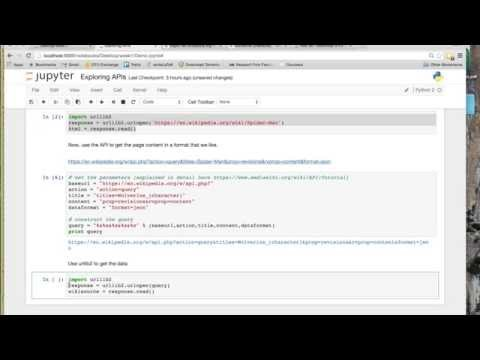

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("9l5zOfh0CRo", width=800, height=450)

It's time for you to get to work. Take a look at the two texts below - just to get a sense of a more technical description of how APIs work.

Again, this is a Python 2 video, so small changes may apply. This video will be updated soon. Hint: **[Here](https://github.com/SocialComplexityLab/socialgraphs2024/blob/main/files/API_check.ipynb)** is a Python3 version of the notebook used in the video that you can work from.


> _Reading_ (just skim): [Wikipedia page on APIs](https://en.wikipedia.org/wiki/Web_API)  
> _Reading_ (just skim): [Wikipedia page on REST for web services](https://en.wikipedia.org/wiki/Representational_state_transfer#Applied_to_web_services)
> 

> *Exercise*: 
> * Explain in your own words: What is the the difference between the html page and the wiki-source?
> * What are the various parameters you can set for a query of the wikipedia api?
> * Write your own little `notebook` to download wikipedia pages based on the video above. Download the source for your 4 favorite wikipedia pages.

### 1. Difference between the HTML page and the wiki-source
The **HTML page** is what your browser shows you when you visit a Wikipedia article. It contains styling, layout, and interactive elements so that humans can read and navigate easily.  
The **wiki-source** (from the Wikipedia API) is the structured raw content of the page, usually in JSON or XML format. It strips away styling and presentation and instead provides the page text and metadata in a machine-readable way, which is much more useful for programmatic access and data analysis.

### 2. Parameters you can set for a query of the Wikipedia API
 
Some commonly used parameters in the [Wikipedia API](https://www.mediawiki.org/wiki/API:Main_page) are:
 
 * `action` – what you want to do (e.g. `query`, `parse`, `opensearch`, etc.).
 * `format` – the output format (e.g. `json`, `xml`).
 * `titles` – the title(s) of the Wikipedia page(s) you want.
 * `prop` – what properties to include (e.g. `extracts`, `revisions`, `info`, `links`).
 * `exintro` – only return the introduction section (when used with extracts).#
 * `explaintext` – return plain text instead of HTML.
 * `redirects` – automatically resolve redirects.
 * `limit` – number of results to return (when applicable).
 
 These parameters can be combined to tailor the API request to your needs.

In [3]:
import requests

# Base URL for Wikipedia API
WIKI_API_URL = "https://en.wikipedia.org/w/api.php"

# Add headers (important for Wikipedia API!)
HEADERS = {
    "User-Agent": "SocialGraphsCourse/1.0 (https://github.com/yourusername)"
}

# Your 4 favorite Wikipedia pages
pages = ["Python (programming language)", 
         "Network science", 
         "Game of Thrones", 
         "Edinburgh"]

for page in pages:
    params = {
        "action": "query",
        "format": "json",
        "titles": page,
        "prop": "extracts",
        "explaintext": True  # plain text (no HTML or markup)
    }
    
    response = requests.get(WIKI_API_URL, params=params, headers=HEADERS)
    
    # Debugging: check if request worked
    if response.status_code != 200:
        print(f"Request failed for {page} with status {response.status_code}")
        print(response.text[:500])  # print first part of response
        continue
    
    try:
        data = response.json()
    except ValueError:
        print(f"Could not decode JSON for {page}")
        print(response.text[:500])
        continue
    
    # Extract page content
    page_id = list(data["query"]["pages"].keys())[0]
    content = data["query"]["pages"][page_id].get("extract", "No extract available")
    
    print(f"\n=== {page} ===\n")
    print(content[:500])  # print first 500 chars for preview



=== Python (programming language) ===

Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation.
Python is dynamically type-checked and garbage-collected. It supports multiple programming paradigms, including structured (particularly procedural), object-oriented and functional programming.
Guido van Rossum began working on Python in the late 1980s as a successor to the ABC programming language. Python 3.0, released in 2008, was a major revi

=== Network science ===

Network science is an academic field which studies complex networks such as telecommunication networks, computer networks, biological networks, cognitive and semantic networks, and social networks, considering distinct elements or actors represented by nodes (or vertices) and the connections between the elements or actors as links (or edges).  The field draws on theories and methods including graph theory from mathematics, statis

# Part 2: Basic description of networks

Now let's get to some some lecturing. I love networks, so I'll take some time time today to tell you about them.

> **_Video Lecture_**. Start by watching the "History of Networks" below


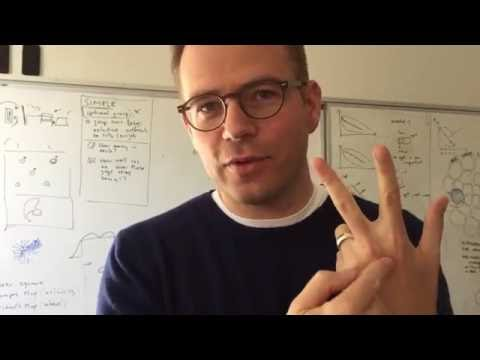

In [3]:
YouTubeVideo("qjM9yMarl70", width=800, height=450)

> _Reading_. We'll be reading the textbook _Network Science_ (NS) by Laszlo Barabasi. You can read the whole 
> thing for free [**here**](http://networksciencebook.com). If you like paper books, the DTU Bookstore has good deals, I am told.
> 
> * Read chapter 1\.
> 

> _Exercises_  
> _Chapter 1_ (Don't forget that you should be answering these in an IPython notebook.) 
> 
> * List three different real networks and state the nodes and links for each of them.
> * Tell us of the network you are personally most interested in (a fourth one). Address the following questions:
>   * What are its nodes and links? 
>   * How large is it? 
>   * Can be mapped out? 
>   * Does it evolve over time?
>   * Are there processes occurring ON the network? (information spreading, for example)
>   * Why do you care about it? 
> * In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book.

### Exercise 1. List three different real networks and state the nodes and links for each of them.

1. **Air transportation network**  
   - **Nodes**: Airports  
   - **Links**: Direct flights between airports  

2. **Facebook social network**  
   - **Nodes**: Individual users  
   - **Links**: Friendships (mutual connections)  

3. **Power grid**  
   - **Nodes**: Power stations, substations, and consumers  
   - **Links**: Transmission lines carrying electricity  

**Scientific collaboration network**  

- **Nodes**: Researchers  
- **Links**: Co-authorship relationships on academic papers  
- **Size**: Millions of researchers worldwide; extremely large, but often studied within subfields  
- **Can it be mapped?** Yes — databases like *Web of Science*, *Scopus*, or *Google Scholar* provide rich data for mapping  
- **Does it evolve over time?** Yes — new researchers enter, collaborations change, fields rise/fall over time  
- **Processes on the network**:  
  - Information spreading (new ideas or methods)  
  - Reputation/impact spreading (citations, collaborations)  
- **Why do I care about it?**  
  It reveals how knowledge emerges and diffuses, and how collaboration patterns shape innovation.  


**Health and medicine (network biology & network medicine).**

- Human disease is often not caused by a single gene, but by perturbations in *networks* of genes, proteins, and metabolites.  
- Understanding these molecular interaction networks could transform **drug discovery**, helping to design drugs that target diseases more precisely and with fewer side effects.  
- Network science can also improve personalized medicine by modeling how genetic and lifestyle factors interact within health-related networks.  

**Conclusion**:  
The next decade will likely see network science become central to **personalized medicine and drug discovery**, making it one of the most impactful applications.

# Part 3: The awesome `NetworkX` library

In case it wasn't clear by now, this class is about YOU analyzing networks. And it wouldn't be right to start the first lecture without playing a little bit with network analysis (there will be much more on this in the following lectures). So here goes...

`NetworkX` should already be installed as part of your _Anaconda_ Python distribution. But you don't know how to use it yet. The best way to get familiar is to work through a tutorial. That's what the next exercise is about

> *Exercises*:
> 
> * Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial.html). The goal of this exercise is to create your own Notebook that contains the entire tutorial. You're free to add your own (e.g. shorter) comments in place of the ones in the official tutorial - and change the code to make it your own where ever it makes sense. 

There will be much more on NetworkX next time.

In [1]:
# 0) Setup: imports and version check
import networkx as nx
import matplotlib.pyplot as plt

print("NetworkX version:", nx.__version__)

NetworkX version: 3.5


In [2]:
# 1) Creating graphs (undirected, directed, multigraphs)
# ------------------------------------------------
G = nx.Graph()        # undirected simple graph
DG = nx.DiGraph()     # directed graph
MG = nx.MultiGraph()  # undirected with parallel edges
MDG = nx.MultiDiGraph()  # directed with parallel edges

print("Types created:", type(G).__name__, type(DG).__name__, type(MG).__name__, type(MDG).__name__)


Types created: Graph DiGraph MultiGraph MultiDiGraph



G nodes: ['A', 1, 2, 3]
G edges: [('A', 1), (1, 2), (2, 3)]


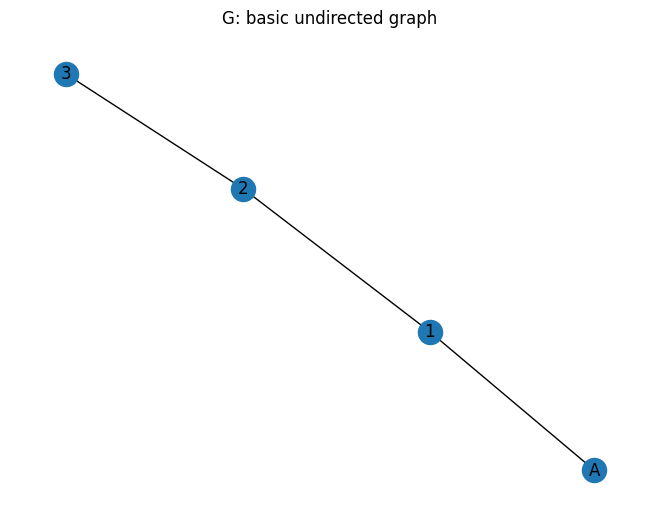


Number of nodes: 4
Number of edges: 3
Degree dict: {'A': 1, 1: 2, 2: 2, 3: 1}
Neighbors of 2: [1, 3]


In [8]:
# 2) Add nodes and edges (nodes can be any hashable object)
# ------------------------------------------------
G = nx.Graph()
G.add_node("A")
G.add_nodes_from([1, 2, 3])
G.add_edge("A", 1)
G.add_edges_from([(1, 2), (2, 3)])

print("\nG nodes:", list(G.nodes()))
print("G edges:", list(G.edges()))

# Quick drawing for visual sanity check
plt.figure()
nx.draw(G, with_labels=True)
plt.title("G: basic undirected graph")
plt.show()

# 3) Inspect basic properties
# ------------------------------------------------
print("\nNumber of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Degree dict:", dict(G.degree()))
print("Neighbors of 2:", list(G.neighbors(2)))

In [9]:
# 4) Remove a node/edge
# ------------------------------------------------
if G.has_edge(1, 2):
    G.remove_edge(1, 2)
if "A" in G:
    G.remove_node("A")

print("\nAfter removals — nodes:", list(G.nodes()))
print("After removals — edges:", list(G.edges()))



After removals — nodes: [1, 2, 3]
After removals — edges: [(2, 3)]


In [10]:
# 5) Paths & connectivity on a simple path graph
# ------------------------------------------------
H = nx.path_graph(6)  # nodes: 0-5 in a line
print("\nShortest path 0→5:", nx.shortest_path(H, 0, 5))
print("Shortest path length 0→5:", nx.shortest_path_length(H, 0, 5))
print("Is connected (undirected)?", nx.is_connected(H))

# Add an extra edge to create alternative routes
H.add_edge(2, 5)
print("New shortest path 0→5:", nx.shortest_path(H, 0, 5))

# Connected components
CCs = list(nx.connected_components(H))
print("Connected components:", CCs)


Shortest path 0→5: [0, 1, 2, 3, 4, 5]
Shortest path length 0→5: 5
Is connected (undirected)? True
New shortest path 0→5: [0, 1, 2, 5]
Connected components: [{0, 1, 2, 3, 4, 5}]


In [11]:
# 6) Clustering & centrality (quick glimpse)
# ------------------------------------------------
# Clustering coefficient (undirected simple graph)
und = H.to_undirected()
print("\nAverage clustering (H):", nx.average_clustering(und))

# Betweenness centrality (which nodes sit on many shortest paths?)
bet_c = nx.betweenness_centrality(und)
print("Betweenness centrality (H):", {k: round(v, 3) for k, v in bet_c.items()})



Average clustering (H): 0.0
Betweenness centrality (H): {0: 0.0, 1: 0.4, 2: 0.65, 3: 0.15, 4: 0.05, 5: 0.15}


In [12]:
# 7) Attributes on nodes/edges/graph
# ------------------------------------------------
A = nx.Graph()
A.add_nodes_from([1, 2, 3])
A.add_edges_from([(1, 2), (2, 3)])

# Node attributes (dict-of-dicts or single attr for all)
nx.set_node_attributes(A, {1: {"role": "source"}, 2: {"role": "bridge"}, 3: {"role": "sink"}})

# Edge attributes (assign directly or with set_edge_attributes)
A[1][2]["weight"] = 4.2
A[2][3]["weight"] = 1.7

# Graph-level attributes
A.graph["name"] = "Tiny attribute demo"

print("\nA node data:", list(A.nodes(data=True)))
print("A edge data:", list(A.edges(data=True)))
print("A graph data:", A.graph)


A node data: [(1, {'role': 'source'}), (2, {'role': 'bridge'}), (3, {'role': 'sink'})]
A edge data: [(1, 2, {'weight': 4.2}), (2, 3, {'weight': 1.7})]
A graph data: {'name': 'Tiny attribute demo'}



D edges: [(1, 2), (2, 3), (3, 1), (3, 4)]
In-degree: {1: 1, 2: 1, 3: 1, 4: 1}
Out-degree: {1: 1, 2: 1, 3: 2, 4: 0}
Strongly connected? False
Weakly connected? True


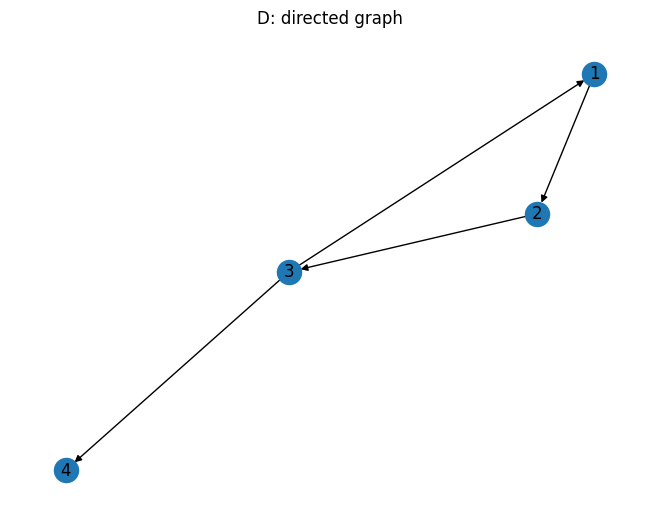

In [13]:
# 8) Directed graphs specifics
# ------------------------------------------------
D = nx.DiGraph()
D.add_edges_from([(1, 2), (2, 3), (3, 1), (3, 4)])
print("\nD edges:", list(D.edges()))
print("In-degree:", dict(D.in_degree()))
print("Out-degree:", dict(D.out_degree()))
print("Strongly connected?", nx.is_strongly_connected(D))
print("Weakly connected?", nx.is_weakly_connected(D))

# Draw with arrows
plt.figure()
pos = nx.spring_layout(D, seed=7)
nx.draw(D, pos, with_labels=True, arrows=True)
plt.title("D: directed graph")
plt.show()

In [14]:
# 9) MultiGraph (parallel edges)
# ------------------------------------------------
M = nx.MultiGraph()
M.add_edge("x", "y", key="e1", capacity=10)
M.add_edge("x", "y", key="e2", capacity=5)
print("\nMultiGraph edges (keys+data):", list(M.edges(keys=True, data=True)))



MultiGraph edges (keys+data): [('x', 'y', 'e1', {'capacity': 10}), ('x', 'y', 'e2', {'capacity': 5})]


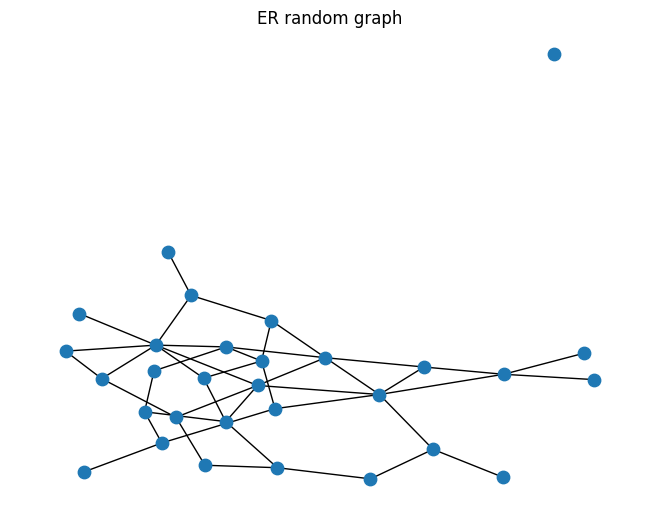

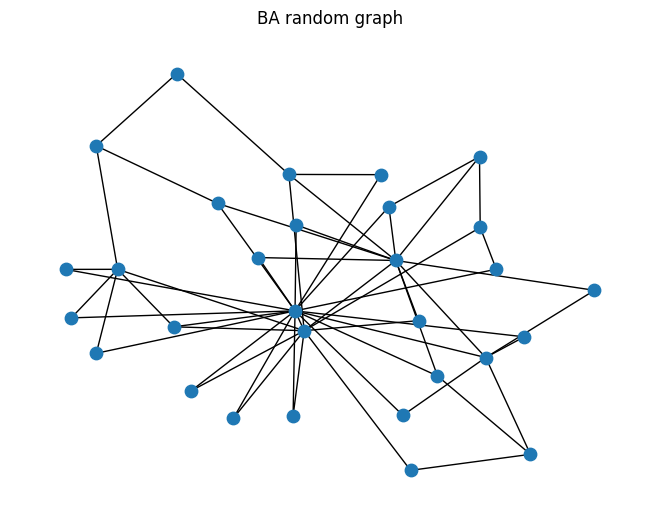

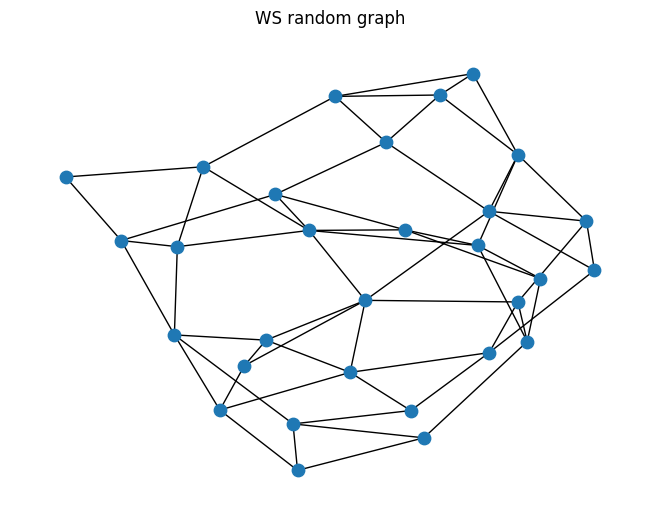


Avg clustering — ER: 0.09
Avg clustering — BA: 0.3
Avg clustering — WS: 0.261


In [15]:
# 10) Random graph generators (ER, BA, WS)
# ------------------------------------------------
er = nx.erdos_renyi_graph(n=30, p=0.1, seed=42)     # G(n, p)
ba = nx.barabasi_albert_graph(n=30, m=2, seed=42)   # preferential attachment (scale-free)
ws = nx.watts_strogatz_graph(n=30, k=4, p=0.2, seed=42)  # small-world

for name, g in [("ER", er), ("BA", ba), ("WS", ws)]:
    plt.figure()
    nx.draw(g, with_labels=False, node_size=80)
    plt.title(f"{name} random graph")
    plt.show()

print("\nAvg clustering — ER:", round(nx.average_clustering(er), 3))
print("Avg clustering — BA:", round(nx.average_clustering(ba), 3))
print("Avg clustering — WS:", round(nx.average_clustering(ws), 3))

In [16]:
# 12) A couple more measures (PageRank & closeness)
# ------------------------------------------------
# PageRank is defined for DiGraph; we'll use D (already defined)
pr = nx.pagerank(D, alpha=0.85)
print("\nPageRank on D:", {k: round(v, 3) for k, v in pr.items()})

clo = nx.closeness_centrality(A)
print("Closeness centrality on A:", {k: round(v, 3) for k, v in clo.items()})

print("\n✅ Done.")


PageRank on D: {1: 0.214, 2: 0.265, 3: 0.308, 4: 0.214}
Closeness centrality on A: {1: 0.667, 2: 1.0, 3: 0.667}

✅ Done.
